In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from keras.layers import *
from keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [2]:
tf.keras.datasets.cifar10.load_data()
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
train_labels = train_labels.reshape(train_labels.shape[0])
test_labels = test_labels.reshape(test_labels.shape[0])
print(train_labels.shape, test_labels.shape)

(50000,) (10000,)


In [5]:
# Label	Description
# 0	airplane
# 1	automobile
# 2	bird
# 3	cat
# 4	deer
# 5	dog
# 6	frog
# 7	horse
# 8	ship
# 9	truck

In [6]:
class_names= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

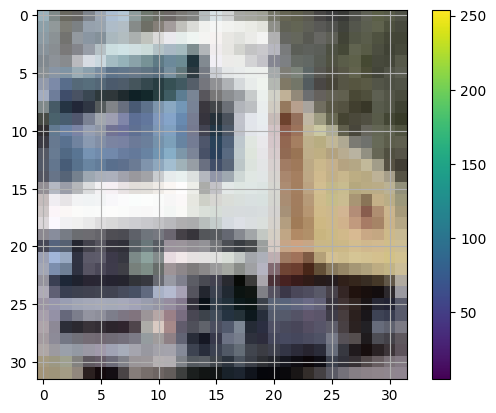

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(True)
plt.show()

In [8]:
# Data Normalization/ Feature Scaling is mandatory in Deep Learning
train_images = train_images/255.0
test_images = test_images/255.0

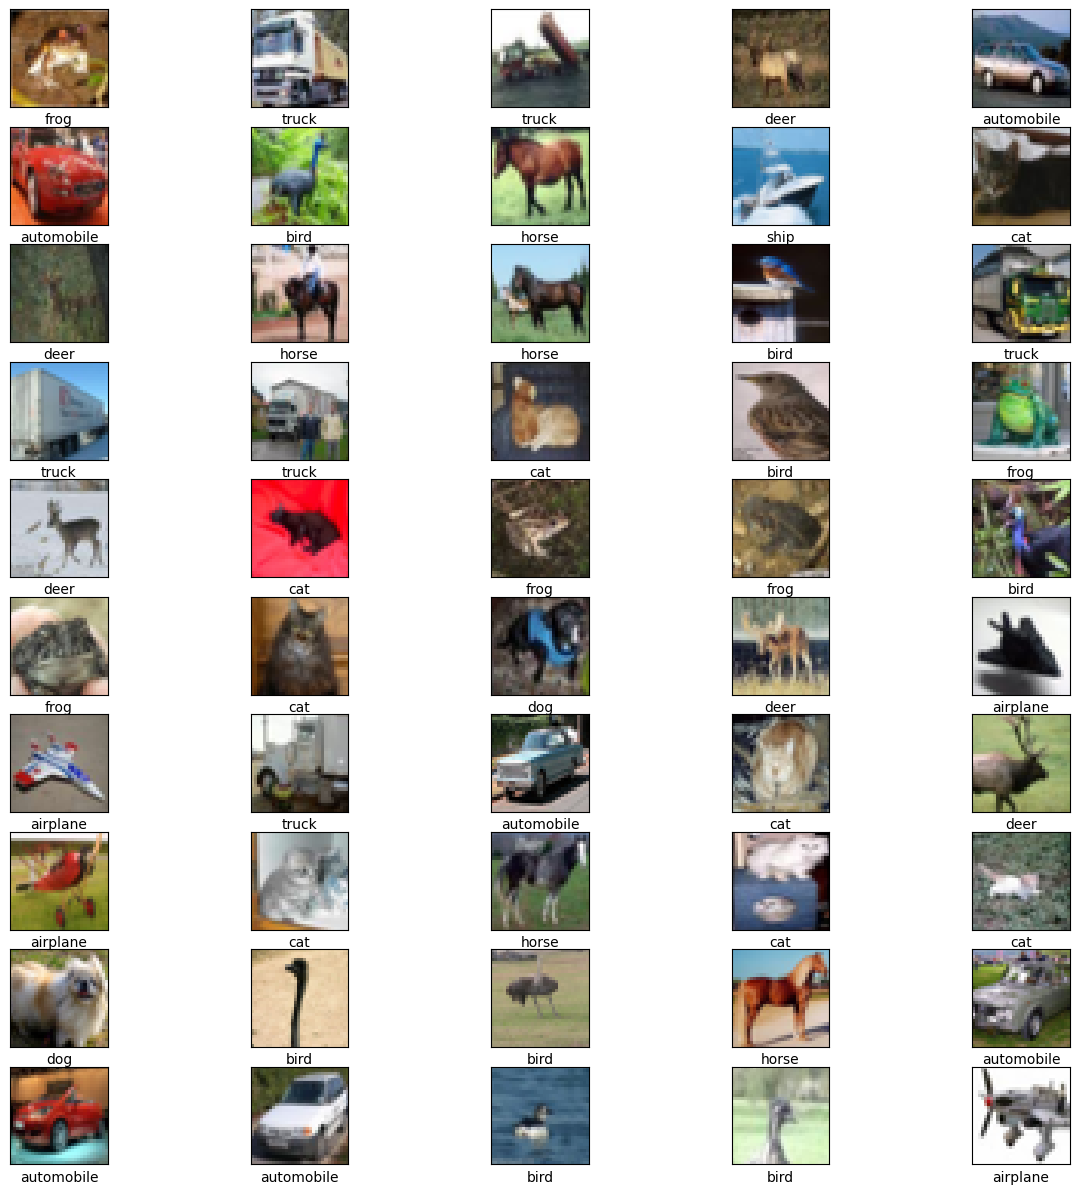

In [9]:
# Lets see few more images

plt.figure(figsize=(15,15))

for i in range(50):
  plt.subplot(10,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


In [10]:
# # Building model to train

# model1 = Sequential()
# model1.add(Flatten())
# model1.add(Dense(256, activation='relu', input_shape=(32,32,3)))
# model1.add(Dropout(0.25))
# model1.add(BatchNormalization())
# model1.add(Dense(256, activation = 'relu'))
# model1.add(Dropout(0.25))
# model1.add(BatchNormalization())
# model1.add(Dense(10, activation = 'softmax'))

In [11]:
# model1.compile(optimizer='adam', loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [12]:
# model1.fit(train_images, train_labels, batch_size=512, epochs=100, validation_data=(test_images, test_labels))

In [13]:
# Building model to train

model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(256, activation='leaky_relu', input_shape=(32,32,3)))
model2.add(Dropout(0.4))
model2.add(BatchNormalization())
model2.add(Dense(256, activation = 'leaky_relu'))
model2.add(Dropout(0.4))
model2.add(BatchNormalization())
model2.add(Dense(256, activation = 'leaky_relu'))
model2.add(Dropout(0.4))
model2.add(BatchNormalization())
model2.add(Dense(256, activation = 'leaky_relu'))
model2.add(Dropout(0.4))
model2.add(BatchNormalization())
model2.add(Dense(256, activation = 'leaky_relu'))
model2.add(Dropout(0.4))
model2.add(BatchNormalization())
model2.add(Dense(256, activation = 'leaky_relu'))
model2.add(Dropout(0.4))
model2.add(BatchNormalization())
model2.add(Dense(10, activation = 'softmax'))

In [14]:
model2.compile(optimizer='adam', loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model2.fit(train_images, train_labels, batch_size=1024, epochs= 2500, validation_data=(test_images, test_labels))

Epoch 1/2500


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


49/49 [==============================] - 14s 201ms/step - loss: 2.5251 - accuracy: 0.1548 - val_loss: 2.4265 - val_accuracy: 0.1562
Epoch 2/2500
49/49 [==============================] - 10s 195ms/step - loss: 2.1545 - accuracy: 0.2157 - val_loss: 2.0231 - val_accuracy: 0.2856
Epoch 3/2500
49/49 [==============================] - 9s 195ms/step - loss: 2.0220 - accuracy: 0.2527 - val_loss: 1.8718 - val_accuracy: 0.3156
Epoch 4/2500
49/49 [==============================] - 8s 167ms/step - loss: 1.9392 - accuracy: 0.2851 - val_loss: 1.9069 - val_accuracy: 0.3217
Epoch 5/2500
49/49 [==============================] - 10s 195ms/step - loss: 1.8848 - accuracy: 0.3061 - val_loss: 1.8917 - val_accuracy: 0.3289
Epoch 6/2500
49/49 [==============================] - 10s 195ms/step - loss: 1.8330 - accuracy: 0.3280 - val_loss: 1.7904 - val_accuracy: 0.3339
Epoch 7/2500
49/49 [==============================] - 8s 169ms/step - loss: 1.8126 - accuracy: 0.3406 - val_loss: 1.7084 - val_accuracy: 0.3742
E

In [ ]:
# Building model to train

model3 = Sequential()
model3.add(Flatten())
model3.add(Dense(256, activation='leaky_relu', input_shape=(32,32,3)))
model3.add(Dropout(0.3))
model3.add(Dense(256, activation = 'leaky_relu'))
model3.add(Dropout(0.3))
model3.add(Dense(10, activation = 'softmax'))

In [ ]:
model3.compile(optimizer='adam', loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model3.fit(train_images, train_labels, batch_size=512, epochs=300, validation_data=(test_images, test_labels))

In [ ]:
!pip install keras-tuner --upgrade

In [ ]:
import keras_tuner as kt

In [ ]:
def build_model(hp):
  model = Sequential()
  model.add(Flatten())
  counter = 0
  for i in range(hp.Int("no.of hidden layers ", min_value=1, max_value=10)):
    if counter == 0:
      model.add(Dense(hp.Int("no.of neurons " + str(i), min_value=8, max_value=128, step=8),
                      activation = hp.Choice('activation'+ str(i), values= ['relu', 'leaky_relu', 'softmax', 'tanh', 'sigmoid']), input_shape=(32,32,3)))
      model.add(Dropout(hp.Choice('dropout'+ str(i), values= [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45])))
    else:
      model.add(Dense(hp.Int('no.of neurons ' + str(i), min_value=8, max_value=128, step=8),
                      activation = hp.Choice('activation' + str(i), values= ['relu', 'leaky_relu', 'softmax', 'tanh', 'sigmoid'])))
      model.add(Dropout(hp.Choice('dropout '+ str(i), values= [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45])))
    counter+=1
  model.add(Dense(10, activation = 'softmax'))
  model.compile(optimizer = hp.Choice("optimizer", values= ['rmsprop', 'sgd', 'adadelta', 'adam', 'adagrad']),
                loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  return model

In [ ]:
tuner = kt.RandomSearch(build_model, objective = 'val_accuracy', max_trials=10, directory='HPT_CIFAR10', project_name='CIFAR10')

In [ ]:
tuner.search(train_images, train_labels, epochs = 5, validation_data = (test_images, test_labels))

In [ ]:
tuner.get_best_hyperparameters()[0].values

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

In [ ]:
model.fit(train_images, train_labels, batch_size=32, epochs=100, initial_epoch=5, validation_data=(test_images, test_labels))

In [ ]:
model3 = Sequential()
model3.add(Flatten())
model3.add(Dense(32, activation='leaky_relu', input_shape=(32,32,3)))
model3.add(Dropout(0.4))
model3.add(BatchNormalization())
model3.add(Dense(32, activation='leaky_relu'))
model3.add(Dropout(0.4))
model3.add(BatchNormalization())
model3.add(Dense(32, activation='leaky_relu'))
model3.add(Dropout(0.4))
model3.add(BatchNormalization())
model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='adam', loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model3.fit(train_images, train_labels, batch_size=256, epochs=100, validation_data=(test_images, test_labels))